In [1]:
import gzip
import ipyrad
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import entropy

In [22]:
data = "/home/isaac/src/ipyrad/tests/ipsimdata/rad_example_R1_.fastq.gz"
dat = gzip.open(data).readlines()[1::4]
dat[:4]

[b'CTCCAATCCTGCAGTTTAACTGTTCAAGTTGGCAAGATCAAGTCGTCCCTAGCCCCCGCGTCCGTTTTTACCTGGTCGCGGTCCCGACCCAGCTGCCCCC\n',
 b'CTCCAATCCTGCAGTTTAACTGTTCAAGTTGGCAAGATCAAGTCGTCCCTAGCCCCCGCGTCCGTTTTTACCTGGTCGCGGTCCCCACCCAGCTGCCCCC\n',
 b'CTCCAATCCTGCAGTTTAACTGTTCAAGTTGGCAAGATCAAGTCGTCCCTAGCCCCCGCGTCCGTTTTTACCTGGTCGCGGTCCCGACCCAGCTGCCCCC\n',
 b'CTCCAATCCTGCAGTTTAACTGTTCAAGTTGGCAAGATCAAGTCGTCCCTAGCCCCCGCGTCCGTTTTTACCTGGTCGCGGTCCCGACCCAGCTGCCCCC\n']

In [24]:
data = "/home/isaac/proj/IMEMEBA/MiSeq_SOP/F3D0_S188_L001_R1_001.fastq"
dat = open(data).readlines()[1::4]
dat = [x.strip() for x in dat]
dat[:4]
print(len(dat[0]))
print(len(dat))

251
7793


In [13]:
uniqs = set(dat)
print(len(uniqs))

2884


In [75]:
ipyrad.bins.vsearch
samp = "F3D0_S188_L001_R1_001"
data = "/home/isaac/proj/IMEMEBA/MiSeq_SOP/{samp}.fastq".format(samp=samp)
tols = np.linspace(99, 80, 20)/100
for tol in tols:
    cmd = ["vsearch",
               "-cluster_smallmem", "{fasta}",
               "-strand", "plus",
               "-id", "{tol}",
               "-userout", "{taxa}.utmp",
               "-userfields", "query+target+id+gaps+qstrand+qcov",
               "-maxaccepts", "1",
               "-maxrejects", "0",
               "-notmatched", "{taxa}.htmp",
               "-fasta_width", "0",
               "-fulldp",
               "-usersort"]
    cmd = " ".join(cmd).format(fasta=data, tol=tol, taxa=samp+str(tol))
    !$cmd

vsearch v2.21.1_linux_x86_64, 251.8GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file /home/isaac/proj/IMEMEBA/MiSeq_SOP/F3D0_S188_L001_R1_001.fastq 100%
1955914 nt in 7793 seqs, min 249, max 251, avg 251
Masking 100%
Counting k-mers 100%


Clustering 100%                                                                                                                                                                        
Sorting clusters 100%
Writing clusters 100% 
Clusters: 1366 Size min 1, max 645, avg 5.7
Singletons: 1066, 13.7% of seqs, 78.0% of clusters
vsearch v2.21.1_linux_x86_64, 251.8GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file /home/isaac/proj/IMEMEBA/MiSeq_SOP/F3D0_S188_L001_R1_001.fastq 100%  
1955914 nt in 7793 seqs, min 249, max 251, avg 251
Masking 100% 
Counting k-mers 100% 
Clustering 100%                                                                                                                
Sorting clusters 100%
Writing clusters 100% 
Clusters: 795 Size min 1, max 718, avg 9.8
Singletons: 565, 7.3% of seqs, 71.1% of clusters
vsearch v2.21.1_linux_x86_64, 251.8GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file /home/isaac/proj/IMEMEBA/MiSeq_SOP/F3D0_S188_L001_

Clustering 100%       
Sorting clusters 100%
Writing clusters 100% 
Clusters: 65 Size min 1, max 3890, avg 119.9
Singletons: 32, 0.4% of seqs, 49.2% of clusters
vsearch v2.21.1_linux_x86_64, 251.8GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file /home/isaac/proj/IMEMEBA/MiSeq_SOP/F3D0_S188_L001_R1_001.fastq 100%  
1955914 nt in 7793 seqs, min 249, max 251, avg 251
Masking 100% 
Counting k-mers 100% 
Clustering 100%        
Sorting clusters 100%
Writing clusters 100% 
Clusters: 58 Size min 1, max 3897, avg 134.4
Singletons: 24, 0.3% of seqs, 41.4% of clusters
vsearch v2.21.1_linux_x86_64, 251.8GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file /home/isaac/proj/IMEMEBA/MiSeq_SOP/F3D0_S188_L001_R1_001.fastq 100%  
1955914 nt in 7793 seqs, min 249, max 251, avg 251
Masking 100% 
Counting k-mers 100% 
Clustering 100%        
Sorting clusters 100%
Writing clusters 100% 
Clusters: 50 Size min 1, max 3919, avg 155.9
Singletons: 20, 0.3% of seqs, 40.0% of cluste

In [76]:
!wc -l F3D0_S188_L001_R1_0010.*htmp
!wc -l F3D6_S194_L001_R2_0010.*htmp
print(31956/4)
print(31172/4)

    116 F3D0_S188_L001_R1_0010.81.htmp
    130 F3D0_S188_L001_R1_0010.82.htmp
    142 F3D0_S188_L001_R1_0010.83.htmp
    150 F3D0_S188_L001_R1_0010.84.htmp
    168 F3D0_S188_L001_R1_0010.85.htmp
    190 F3D0_S188_L001_R1_0010.86.htmp
    212 F3D0_S188_L001_R1_0010.87.htmp
    240 F3D0_S188_L001_R1_0010.88.htmp
    300 F3D0_S188_L001_R1_0010.89.htmp
    100 F3D0_S188_L001_R1_0010.8.htmp
    396 F3D0_S188_L001_R1_0010.91.htmp
    452 F3D0_S188_L001_R1_0010.92.htmp
    532 F3D0_S188_L001_R1_0010.93.htmp
    584 F3D0_S188_L001_R1_0010.94.htmp
    704 F3D0_S188_L001_R1_0010.95.htmp
    850 F3D0_S188_L001_R1_0010.96.htmp
   1190 F3D0_S188_L001_R1_0010.97.htmp
   1590 F3D0_S188_L001_R1_0010.98.htmp
   2732 F3D0_S188_L001_R1_0010.99.htmp
    314 F3D0_S188_L001_R1_0010.9.htmp
  11092 total
    186 F3D6_S194_L001_R2_0010.81.htmp
    204 F3D6_S194_L001_R2_0010.82.htmp
    230 F3D6_S194_L001_R2_0010.83.htmp
    260 F3D6_S194_L001_R2_0010.84.htmp
    302 F3D6_S194_L001_R2_0010.85.htmp
    330 F3D6_

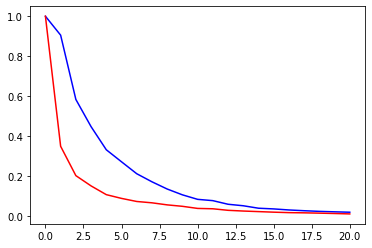

In [79]:
dat1 = """    186 F3D6_S194_L001_R2_0010.81.htmp
    204 F3D6_S194_L001_R2_0010.82.htmp
    230 F3D6_S194_L001_R2_0010.83.htmp
    260 F3D6_S194_L001_R2_0010.84.htmp
    302 F3D6_S194_L001_R2_0010.85.htmp
    330 F3D6_S194_L001_R2_0010.86.htmp
    428 F3D6_S194_L001_R2_0010.87.htmp
    488 F3D6_S194_L001_R2_0010.88.htmp
    632 F3D6_S194_L001_R2_0010.89.htmp
    170 F3D6_S194_L001_R2_0010.8.htmp
    864 F3D6_S194_L001_R2_0010.91.htmp
   1096 F3D6_S194_L001_R2_0010.92.htmp
   1384 F3D6_S194_L001_R2_0010.93.htmp
   1706 F3D6_S194_L001_R2_0010.94.htmp
   2182 F3D6_S194_L001_R2_0010.95.htmp
   2662 F3D6_S194_L001_R2_0010.96.htmp
   3584 F3D6_S194_L001_R2_0010.97.htmp
   4670 F3D6_S194_L001_R2_0010.98.htmp
   7234 F3D6_S194_L001_R2_0010.99.htmp
    684 F3D6_S194_L001_R2_0010.9.htmp""".split("\n")
asvs = sorted([int(x.strip().split()[0]) for x in dat1])[::-1]
plt.plot(np.array([7989]+asvs)/7989, color="blue")

dat2 = """    116 F3D0_S188_L001_R1_0010.81.htmp
    130 F3D0_S188_L001_R1_0010.82.htmp
    142 F3D0_S188_L001_R1_0010.83.htmp
    150 F3D0_S188_L001_R1_0010.84.htmp
    168 F3D0_S188_L001_R1_0010.85.htmp
    190 F3D0_S188_L001_R1_0010.86.htmp
    212 F3D0_S188_L001_R1_0010.87.htmp
    240 F3D0_S188_L001_R1_0010.88.htmp
    300 F3D0_S188_L001_R1_0010.89.htmp
    100 F3D0_S188_L001_R1_0010.8.htmp
    396 F3D0_S188_L001_R1_0010.91.htmp
    452 F3D0_S188_L001_R1_0010.92.htmp
    532 F3D0_S188_L001_R1_0010.93.htmp
    584 F3D0_S188_L001_R1_0010.94.htmp
    704 F3D0_S188_L001_R1_0010.95.htmp
    850 F3D0_S188_L001_R1_0010.96.htmp
   1190 F3D0_S188_L001_R1_0010.97.htmp
   1590 F3D0_S188_L001_R1_0010.98.htmp
   2732 F3D0_S188_L001_R1_0010.99.htmp
    314 F3D0_S188_L001_R1_0010.9.htmp""".split("\n")
asvs = sorted([int(x.strip().split()[0]) for x in dat2])[::-1]
plt.plot(np.array([7793]+asvs)/7793, color="red")

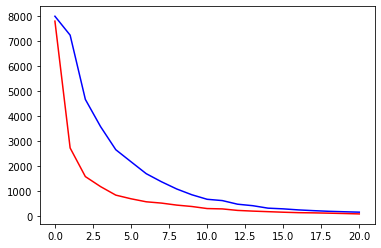

In [81]:
asvs = sorted([int(x.strip().split()[0]) for x in dat1])[::-1]
plt.plot(np.array([7989]+asvs), color="blue")
asvs = sorted([int(x.strip().split()[0]) for x in dat2])[::-1]
plt.plot(np.array([7793]+asvs), color="red")

## Get abundances

In [83]:
samp = "F3D0_S188_L001_R1_001"
data = "/home/isaac/proj/IMEMEBA/MiSeq_SOP/{samp}.fastq".format(samp=samp)
#tols = np.linspace(99, 80, 20)/100
htmp = "/home/isaac/proj/IMEMEBA/F3D0_S188_L001_R1_0010.81.utmp"
utmp = "/home/isaac/proj/IMEMEBA/F3D0_S188_L001_R1_0010.81.htmp"

In [96]:
tols = np.linspace(99, 80, 20)/100
asv_profile = {}
for tol in tols:
    htmp = "/home/isaac/proj/IMEMEBA/F3D0_S188_L001_R1_001{tol}.utmp".format(tol=tol)
    utmp = "/home/isaac/proj/IMEMEBA/F3D0_S188_L001_R1_001{tol}.htmp".format(tol=tol)
    #Load utmp dict
    seeds = open(utmp).readlines()[::2]
    seeds = {x.strip()[1:]:1 for x in seeds}

    hits = open(htmp).readlines()
    for hit in hits:
        _, h, _, _, _, _ = hit.split()
        seeds[h] += 1
    asv_profile[tol] = sorted(list(seeds.values()), reverse=True)

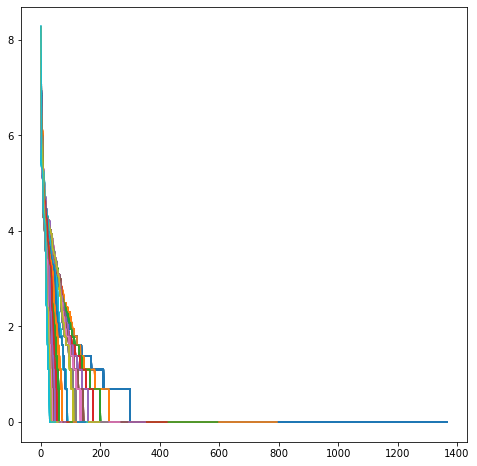

In [106]:
fig, ax = plt.subplots(figsize=(8, 8))
for tol in tols:
    for tol in tols:
        plt.plot(np.log(np.array(asv_profile[tol])), label=tol)
#plt.legend()

In [107]:
samp = "F3D0_S188_L001_R1_001"
data = "/home/isaac/proj/IMEMEBA/MiSeq_SOP/{samp}.fastq".format(samp=samp)
cmd = ["vsearch",
               "-cluster_smallmem", "{fasta}",
               "-strand", "plus",
               "-id", "{tol}",
               "-userout", "{taxa}.utmp",
               "-userfields", "query+target+id+gaps+qstrand+qcov",
               "-maxaccepts", "1",
               "-maxrejects", "0",
               "-notmatched", "{taxa}.htmp",
               "-fasta_width", "0",
               "-fulldp",
               "-usersort"]
cmd = " ".join(cmd).format(fasta=data, tol=1, taxa=samp+str(tol))
!$cmd

vsearch v2.21.1_linux_x86_64, 251.8GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file /home/isaac/proj/IMEMEBA/MiSeq_SOP/F3D0_S188_L001_R1_001.fastq 100%
1955914 nt in 7793 seqs, min 249, max 251, avg 251
Masking 100%
Counting k-mers 100%


Clustering 100%                                                                                                                                                                                                    
Sorting clusters 100%
Writing clusters 100% 
Clusters: 2857 Size min 1, max 456, avg 2.7
Singletons: 2495, 32.0% of seqs, 87.3% of clusters


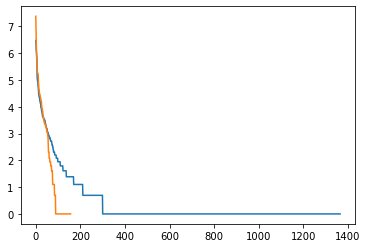

In [111]:
plt.plot(np.log(np.array(asv_profile[0.99])))
plt.plot(np.log(np.array(asv_profile[0.90])))

## Spider data

In [ ]:
def pi(file):
    ## Calculate average pi
    pi = 0
    len_seq = 0
    try:
        f = open(file).readlines()
        ## Get just the sequences
        dat = [list(x.strip()) for x in f if ">" not in x]
        len_seq = len(dat[0])

        ## Transpose, so now we have a list of lists of all bases at each
        ## position.
        dat = np.transpose(np.array(dat))

        ## for each position
        for d in dat:
            ## If the position is _not_ monomorphic
            if len(Counter(d)) > 1:
                ## Enumerate the possible comparisons and for each
                ## comparison calculate the number of pairwise differences,
                ## summing over all sites in the sequence.
                base_count = Counter(d)
                ## ignore indels
                del base_count["-"]
                del base_count["N"]
                for c in combinations(list(base_count.values()), 2):
                    #print(c)
                    n = c[0] + c[1]
                    n_comparisons = float(n) * (n - 1) / 2
                    pi += float(c[0]) * (n-c[0]) / n_comparisons
    except Exception as inst:
        print("Something happenend - {}".format(inst))
        pi = 0
    ## Average over the length of the whole sequence.
    return pi/len_seq

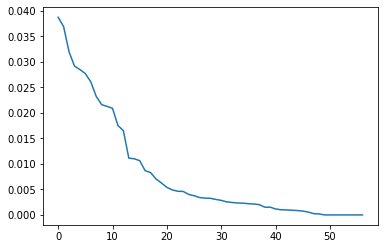

In [122]:
pis = pd.read_csv("MESS/empirical_data/Reunion_spiders/spider.pis", sep=" ", header=None)[0].values
plt.plot(sorted(pis, reverse=True))

In [150]:
sp_data = "/home/isaac/proj/IMEMEBA/MESS/empirical_data/Reunion_spiders/spider-fasta/spiders.fasta"
tols = np.linspace(100, 80, 21)/100
for tol in tols:
    cmd = ["vsearch",
               "-cluster_smallmem", sp_data,
               "-strand", "plus",
               "-id", "{tol}",
               "-userout", sp_data+"-{tol}.utmp",
               "-userfields", "query+target+id+gaps+qstrand+qcov",
               "-maxaccepts", "1",
               "-maxrejects", "0",
               "-notmatched", sp_data+"-{tol}.htmp",
               "-fasta_width", "0",
               "-fulldp",
               "-usersort"]
    cmd = " ".join(cmd).format(tol=tol)
    print(cmd)
    !$cmd

vsearch -cluster_smallmem /home/isaac/proj/IMEMEBA/MESS/empirical_data/Reunion_spiders/spider-fasta/spiders.fasta -strand plus -id 1.0 -userout /home/isaac/proj/IMEMEBA/MESS/empirical_data/Reunion_spiders/spider-fasta/spiders.fasta-1.0.utmp -userfields query+target+id+gaps+qstrand+qcov -maxaccepts 1 -maxrejects 0 -notmatched /home/isaac/proj/IMEMEBA/MESS/empirical_data/Reunion_spiders/spider-fasta/spiders.fasta-1.0.htmp -fasta_width 0 -fulldp -usersort
vsearch v2.21.1_linux_x86_64, 251.8GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file /home/isaac/proj/IMEMEBA/MESS/empirical_data/Reunion_spiders/spider-fasta/spiders.fasta 100%
786244 nt in 1282 seqs, min 555, max 658, avg 613
Masking 100%
Counting k-mers 100%


Clustering 100%                                    
Sorting clusters 100%
Writing clusters 100% 
Clusters: 406 Size min 1, max 39, avg 3.2
Singletons: 232, 18.1% of seqs, 57.1% of clusters
vsearch -cluster_smallmem /home/isaac/proj/IMEMEBA/MESS/empirical_data/Reunion_spiders/spider-fasta/spiders.fasta -strand plus -id 0.99 -userout /home/isaac/proj/IMEMEBA/MESS/empirical_data/Reunion_spiders/spider-fasta/spiders.fasta-0.99.utmp -userfields query+target+id+gaps+qstrand+qcov -maxaccepts 1 -maxrejects 0 -notmatched /home/isaac/proj/IMEMEBA/MESS/empirical_data/Reunion_spiders/spider-fasta/spiders.fasta-0.99.htmp -fasta_width 0 -fulldp -usersort
vsearch v2.21.1_linux_x86_64, 251.8GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file /home/isaac/proj/IMEMEBA/MESS/empirical_data/Reunion_spiders/spider-fasta/spiders.fasta 100%  
786244 nt in 1282 seqs, min 555, max 658, avg 613
Masking 100% 
Counting k-mers 100% 
Clustering 100%                                    
Sorting clusters

vsearch v2.21.1_linux_x86_64, 251.8GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file /home/isaac/proj/IMEMEBA/MESS/empirical_data/Reunion_spiders/spider-fasta/spiders.fasta 100%
786244 nt in 1282 seqs, min 555, max 658, avg 613
Masking 100%
Counting k-mers 100%


Clustering 100%                                
Sorting clusters 100%
Writing clusters 100% 
Clusters: 56 Size min 1, max 114, avg 22.9
Singletons: 6, 0.5% of seqs, 10.7% of clusters
vsearch -cluster_smallmem /home/isaac/proj/IMEMEBA/MESS/empirical_data/Reunion_spiders/spider-fasta/spiders.fasta -strand plus -id 0.9 -userout /home/isaac/proj/IMEMEBA/MESS/empirical_data/Reunion_spiders/spider-fasta/spiders.fasta-0.9.utmp -userfields query+target+id+gaps+qstrand+qcov -maxaccepts 1 -maxrejects 0 -notmatched /home/isaac/proj/IMEMEBA/MESS/empirical_data/Reunion_spiders/spider-fasta/spiders.fasta-0.9.htmp -fasta_width 0 -fulldp -usersort
vsearch v2.21.1_linux_x86_64, 251.8GB RAM, 64 cores
https://github.com/torognes/vsearch

Reading file /home/isaac/proj/IMEMEBA/MESS/empirical_data/Reunion_spiders/spider-fasta/spiders.fasta 100%  
786244 nt in 1282 seqs, min 555, max 658, avg 613
Masking 100% 
Counting k-mers 100% 
Clustering 100%                                  
Sorting clusters 100%
Writi

In [143]:
!wc -l MESS/empirical_data/Reunion_spiders/spider-fasta/*htmp > spider-clusters.txt
sp_clusters = open("spider-clusters.txt").readlines()[:-1]
sp_clusters = [np.array(int(x.strip().split()[0]))/2 for x in sp_clusters]
sp_clusters

[14.0,
 18.0,
 24.0,
 30.0,
 38.0,
 42.0,
 47.0,
 51.0,
 54.0,
 7.0,
 56.0,
 56.0,
 57.0,
 58.0,
 60.0,
 63.0,
 70.0,
 83.0,
 123.0,
 55.0,
 406.0]

[406.0, 123.0, 83.0, 70.0, 63.0, 60.0, 58.0, 57.0, 56.0, 56.0, 55.0, 54.0, 51.0, 47.0, 42.0, 38.0, 30.0, 24.0, 18.0, 14.0, 7.0]


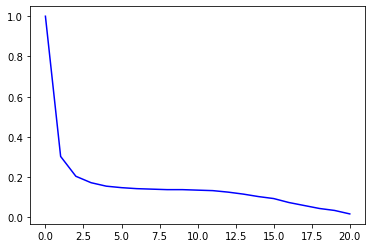

In [151]:
asvs = sorted(sp_clusters)[::-1]
print(asvs)
plt.plot(np.array(asvs)/asvs[0], color="blue")

## Trash
An idea from GPT, it's hard to tell if it makes sense or not
Indicator = ∑(relative abundance of species * Shannon entropy of species)

In [ ]:
abunds = [100, 100, 200, 2000, 5000, 10000]
pis = [0.]